In [1]:
#resonance.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 20 January 2024.
#plot motion of non-interacting particles at m=2 inner Lindblad resonance

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, monitor = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'confine_inner_edge = ', confine_inner_edge
print 'confine_outer_edge = ', confine_outer_edge
print 'satellite = ', satellite
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()
print 'execution time (min) = ', (monitor['current_time'] - monitor['start_time'])/60.0
print 'monitor = ', monitor

r.shape =  (1001, 64, 8)
total_ring_mass =  3.45419683059e-10
shear_viscosity =  -1e-13
bulk_viscosity =  -1e-13
initial_orbits =  {'shape': 'circular'}
confine_inner_edge =  False
confine_outer_edge =  False
satellite =  {'dlc': 1.4780383666979091, 'r': 1.5815932703482751, 'mass': 0.0, 't': 0.0, 'time_grow': 1000000.0, 'm': 2, 'lc': 0.3705530411759321, 'mass_final': 6.5969e-08}
e.min() =  0.0
e.max() =  0.002087039191042017
execution time (min) =  425.833333333
monitor =  {'current_time': 1706580856, 'streamline_crossing_timestep': 66107, 'start_time': 1706555306, 'modified_params': None, 'nan_timestep': None, 'current_timestep': 20000000, 'self_interacting': False}


In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

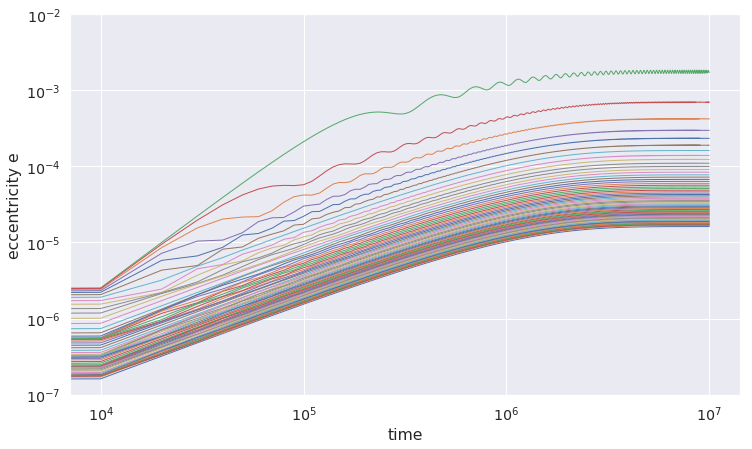

In [4]:
#plot each streamline's eccentricity versus time
sns.set(font_scale=1.3, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(12, 7))
e_mean = e.mean(axis=2).T
for e_streamline in e_mean:
    x = times
    y = e_streamline
    p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_xlabel('time')
p = ax.set_ylabel('eccentricity e')
p = ax.set_ylim(1.0e-7, 1.0e-2)
p = ax.set_xscale('log')
p = ax.set_yscale('log')

In [5]:
times/1.0e7

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

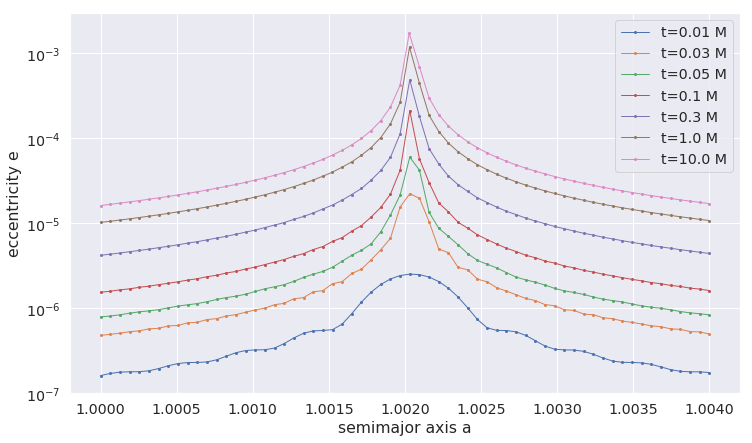

In [6]:
#plot eccentricity versus semimajor axis at selected times
sns.set(font_scale=1.3, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(12, 7))
plot_times = [1.0e4, 3.0e4, 5.0e4, 1.0e5, 3.0e5, 1.0e6, 1.0e7]
for plot_time in plot_times:
    t_idx = np.where(times >= plot_time)[0][0]
    a_now = a[t_idx]
    e_now = e[t_idx]
    time_now = times[t_idx]
    a_mean = a_now.mean(axis=1)
    e_mean = e_now.mean(axis=1)
    x = a_mean
    y = e_mean
    label = 't=' + str(time_now/1.0e6) + ' M'
    p = ax.plot(x, y, linestyle='-', linewidth=1, marker='o', markersize=2, label=label)
p = ax.set_xlabel('semimajor axis a')
p = ax.set_ylabel('eccentricity e')
p = ax.set_ylim(1.0e-7, 3.0e-3)
p = ax.set_yscale('log')
p = plt.legend()

In [7]:
#compute frequency distance from resonance
Kap = Kappa(J2, Rp, a)
Omg = Omega(J2, Rp, a)
m = satellite['m']
a_s = satellite['r']
Omg_s = Omega(J2, Rp, a_s)
wm = m*(Omg - Omg_s)
D = Kap**2 - wm**2

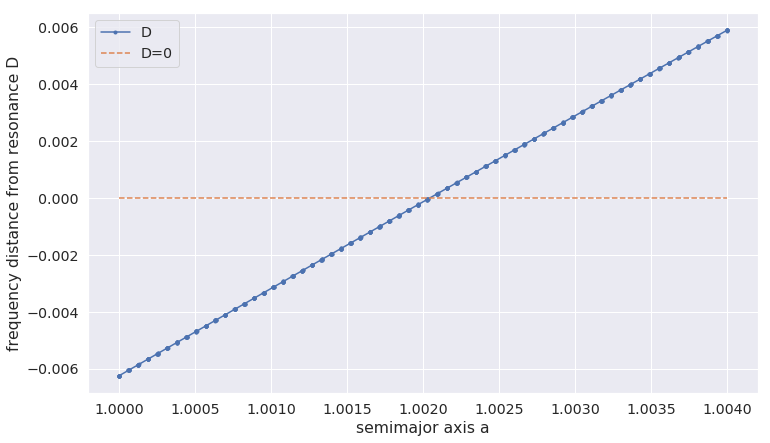

In [8]:
#plot final D versus a
a_final = a[-1].flatten()
D_final = D[-1].flatten()
idx = a_final.argsort()
x = a_final[idx]
y = D_final[idx]
sns.set(font_scale=1.3, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(12, 7))
p = ax.plot(x, y, linestyle='-', marker='o', markersize=3, label='D')
y = x*0
p = ax.plot(x, y, linestyle='dashed', label='D=0')
p = ax.set_xlabel('semimajor axis a')
p = ax.set_ylabel('frequency distance from resonance D')
p = plt.legend()